In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering as Hierarchy
def resample_normalization(data,granularity = '1min'):
    data.index = pd.date_range('2016-01-01-00:00:00','2016-01-01-23:59:59',freq = 'min')
    data = data.resample(granularity,label = 'left').mean()
    data = (data - data.mean(0))/data.std(0)
    return data
def labeled_plot(X,k=31,xnum=4,ynum=8,silent = True):
    '''
    k should <= xnum*ynum
    '''
    dis = distance_matrix(X)
    kmmodel = Hierarchy(k,linkage = 'complete',affinity = 'precomputed')
    kmmodel.fit(dis)
    clusters_dict = {label:0 for label in set(kmmodel.labels_)}
    for i in kmmodel.labels_:
        clusters_dict[i] += 1
    count = pd.DataFrame(clusters_dict,index = ['count']).T.sort_values(by = 'count',ascending = False)
    clusters_dict = {label:0 for label in count.index}
    for label in count.index:
        clusters_dict[label] = X.iloc[:,kmmodel.labels_ == label]
    if not silent:
        fig = plt.figure(figsize=(20,8))
        for k,label in enumerate(count.index):
            fig.add_subplot(xnum,ynum,k+1).plot(clusters_dict[label],alpha = 0.3)
#             plt.subplot(xnum,ynum,k+1).plot(clusters_dict[label].mean(1),'r')
            plt.plot(clusters_dict[label].mean(1),'r')
    return clusters_dict

def distance_matrix(data):
    data = np.array(data)
    distance = data.T.dot(data)
    return distance

In [11]:
data = pd.read_csv('processed_data_with_timeindex.csv',index_col = [0])
data.index = pd.to_datetime(data.index)
# clustering by daily load pattern
# compute average daily pattern
daily_pattern = pd.DataFrame(columns = data.columns)
for i in data.columns:
    daily_pattern[i] = np.nanmean(np.array(data[i][:(data.shape[0] - data.shape[0]%(60*24))]).reshape(-1,24*60),axis = 0)
daily_pattern = daily_pattern.loc[:,daily_pattern.columns[daily_pattern.std(0)!=0]]

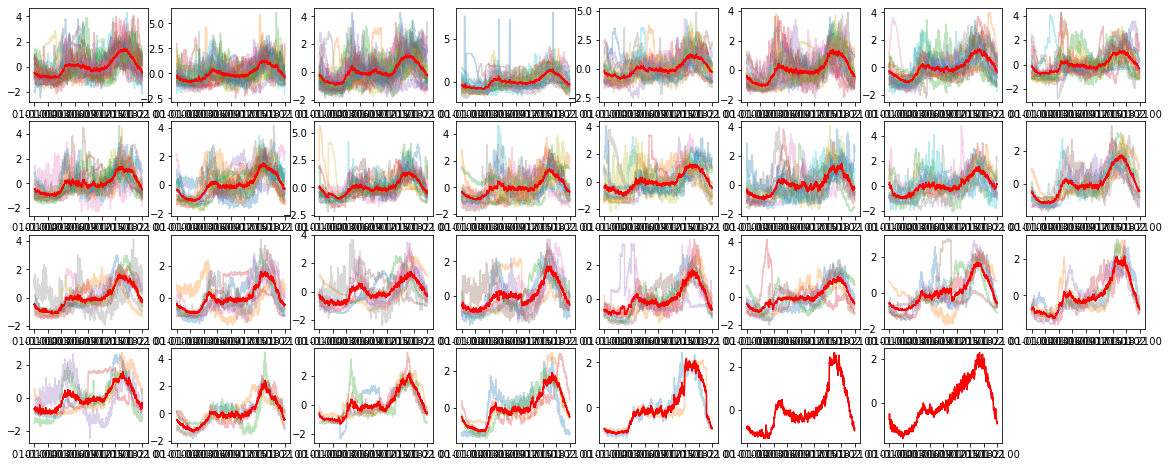

In [45]:
clusters_dict = labeled_plot(resample_normalization(daily_pattern,'1min'),31,4,8,False)

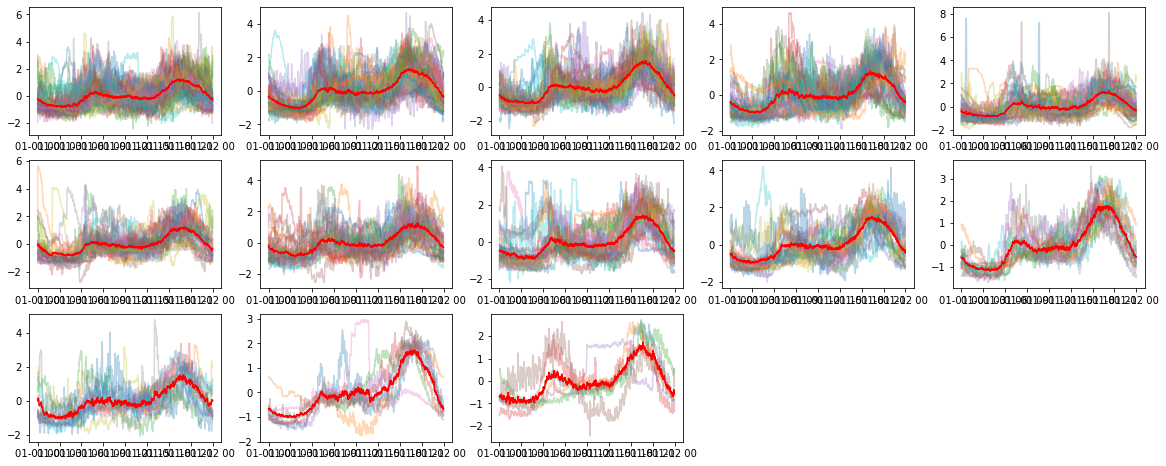

In [46]:
clusters_dict = labeled_plot(resample_normalization(daily_pattern,'1min'),13,3,5,False)

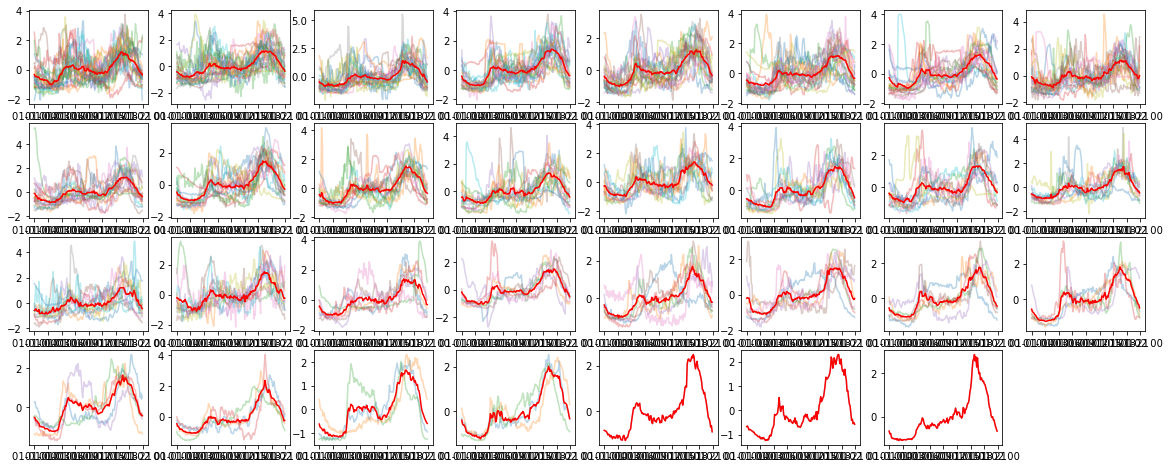

In [47]:
clusters_dict = labeled_plot(resample_normalization(daily_pattern,'10min'),31,4,8,False)

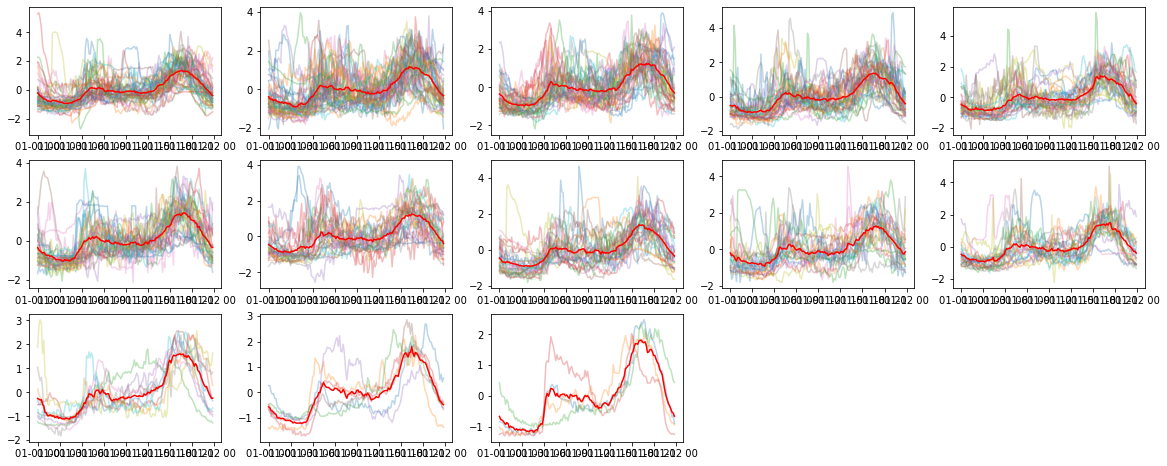

In [48]:
clusters_dict = labeled_plot(resample_normalization(daily_pattern,'10min'),13,3,5,False)